# What we may learn in this section?
- How to define and train the standalone discriminator model for learning the difference between real and fake images
- How to define the standalone generator model and train the composite generator and discriminator model.
- How to evaluate the performance of the GAN and use the final standalone generator model to generate new images.


#### Learning Resource --> https://machinelearningmastery.com/how-to-develop-a-generative-adversarial-network-for-an-mnist-handwritten-digits-from-scratch-in-keras/

In [19]:
#add imports
from keras.datasets.mnist import load_data
#loading the images 
(xtrain,ytrain),(xtest,ytest) = load_data()

print("Train set: {}, {}".format(xtrain.shape,ytrain.shape))
print("Test set: {}, {}".format(xtest.shape,ytest.shape))

Train set: (60000, 28, 28), (60000,)
Test set: (10000, 28, 28), (10000,)


## Plotting A Single Image

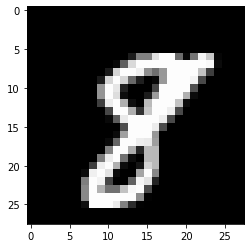

In [20]:
import matplotlib.pyplot as plt 
plt.imshow(xtrain[55],cmap = 'gray')

## Reversing the Image Color

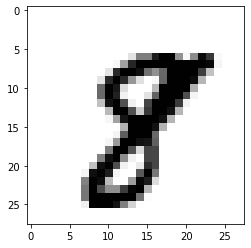

In [21]:
#reversing the image
plt.imshow(xtrain[55],cmap = 'gray_r')

## Plotting 25 Images

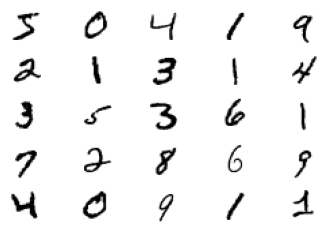

In [22]:

for i in range(25):
  #defining the subplot 
  plt.subplot(5,5,i+1)

  #turning of the axis 
  plt.axis('off')
  plt.imshow(xtrain[i],cmap='gray_r')

# Defining the Discriminnator Model

In [23]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, LeakyReLU
from tensorflow.keras.utils import plot_model 
def Discriminator(input_shape = (28,28,1)):
  model = Sequential()
  model.add(Conv2D(64,(3,3),strides = (2,2),padding='same',input_shape=input_shape))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Dropout(0.4))
  model.add(Conv2D(64,(3,3),strides=(2,2),padding='same'))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Dropout(0.4))
  model.add(Flatten())
  model.add(Dense(1,activation='sigmoid'))

  #model compilation
  optimizer = Adam(lr=0.0002, beta_1=0.5)  
  model.compile(loss='binary_crossentropy',optimizer=optimizer,metrics = ['accuracy'])
  return model

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        640       
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 dropout_2 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 64)          36928     
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 7, 7, 64)          0         
                                                                 
 dropout_3 (Dropout)         (None, 7, 7, 64)          0         
                                                                 
 flatten_1 (Flatten)         (None, 3136)             

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


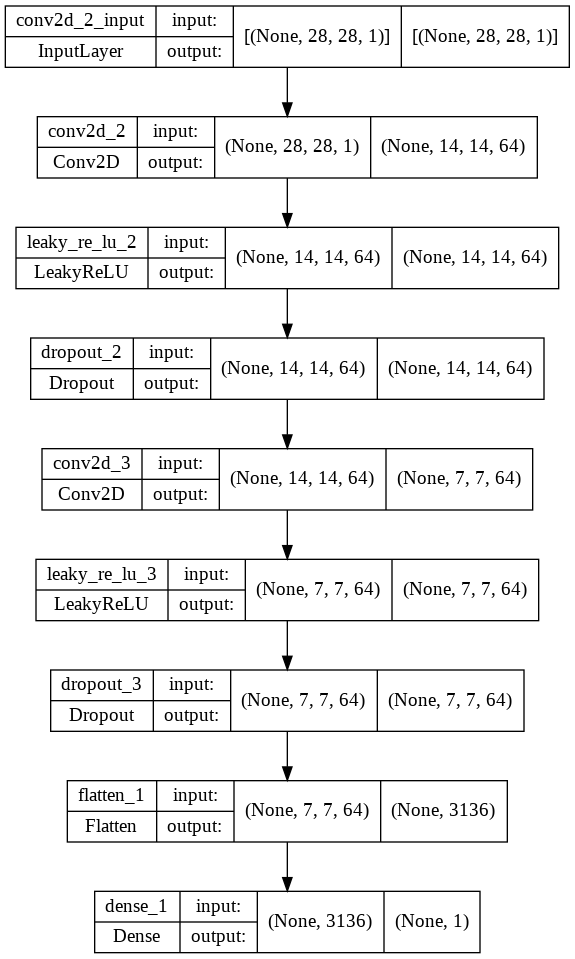

In [24]:
model = Discriminator()
model.summary()
plot_model(model,to_file='plot_discriminator.png',show_shapes=True,show_layer_names=True)

now we are going to create two functions, they may create batches of images and labels, where 1 = real and 0 = fake.

In [50]:
import numpy as np 
def get_all_samples():
  (X,_),(_,_) = load_data()
  X = X.astype('float32')
  X = X/255.0
  return X 
def get_real_samples(dataset, n):

  x_ = np.random.randint(0,dataset.shape[0],n)
  xdata = dataset[x_]
  ydata = np.ones((n,1))
  return xdata, ydata 


def get_fake_samples(n):
  X = np.random.rand(28*28*n)
  X = X.reshape((n,28,28,1))
  y = np.zeros((n,1))
  return X, y

def discriminator_training(model,dataset, iterations=100, batch_size=256):
  half_batch = int(batch_size/2)
  for i in range(iterations):
    xreal, yreal = get_real_samples(dataset, half_batch)

    _, real_accuracy = model.train_on_batch(xreal,yreal)

    xfake, yfake = get_fake_samples(half_batch)
    _, fake_accuracy = model.train_on_batch(xfake,yfake)

    print("Epoch:%d real = %0.0f%%  | fake = %0.0f%% "%(i+1,real_accuracy*100, fake_accuracy*100))




In [51]:
#run the functions.
model = Discriminator()
data = get_all_samples()
discriminator_training(model,data)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch:1 real = 69%  | fake = 11% 
Epoch:2 real = 80%  | fake = 24% 
Epoch:3 real = 74%  | fake = 33% 
Epoch:4 real = 76%  | fake = 52% 
Epoch:5 real = 77%  | fake = 74% 
Epoch:6 real = 77%  | fake = 84% 
Epoch:7 real = 80%  | fake = 91% 
Epoch:8 real = 77%  | fake = 95% 
Epoch:9 real = 73%  | fake = 98% 
Epoch:10 real = 70%  | fake = 99% 
Epoch:11 real = 66%  | fake = 100% 
Epoch:12 real = 76%  | fake = 100% 
Epoch:13 real = 73%  | fake = 100% 
Epoch:14 real = 74%  | fake = 100% 
Epoch:15 real = 68%  | fake = 100% 
Epoch:16 real = 72%  | fake = 100% 
Epoch:17 real = 70%  | fake = 100% 
Epoch:18 real = 76%  | fake = 100% 
Epoch:19 real = 80%  | fake = 100% 
Epoch:20 real = 88%  | fake = 100% 
Epoch:21 real = 84%  | fake = 100% 
Epoch:22 real = 84%  | fake = 100% 
Epoch:23 real = 88%  | fake = 100% 
Epoch:24 real = 87%  | fake = 100% 
Epoch:25 real = 90%  | fake = 100% 
Epoch:26 real = 87%  | fake = 100% 
Epoch:27 real = 95%  | fake = 100% 
Epoch:28 real = 98%  | fake = 100% 
Epoch:29 re

In [29]:
np.random.rand(3*3*2)

array([0.5462943 , 0.1409073 , 0.78657763, 0.45466813, 0.97058417,
       0.88454269, 0.62408369, 0.85674128, 0.40837661, 0.9281964 ,
       0.31383579, 0.88539353, 0.12743583, 0.70989326, 0.15122902,
       0.7929425 , 0.72932848, 0.72138897])